In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Data preprocessing

In [18]:
dataset = pd.read_csv('american.csv')
dataset.columns = [i for i in range(dataset.shape[1])]
dataset

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A
2,0.299407,0.679288,0.210996,0.613102,0.150618,0.522777,0.127314,0.438344,0.130090,0.381808,...,0.574705,0.358198,0.506751,0.360233,0.452296,0.350743,0.506043,0.339431,0.557486,A
3,0.284236,0.729573,0.173007,0.635995,0.111589,0.496627,0.109330,0.372887,0.124706,0.266505,...,0.608846,0.450521,0.479627,0.401771,0.453182,0.359019,0.534598,0.349776,0.602132,A
4,0.272220,0.750940,0.151656,0.647857,0.090840,0.491623,0.096680,0.370796,0.111904,0.266032,...,0.641275,0.449075,0.491492,0.394166,0.473755,0.353244,0.558699,0.346559,0.625984,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77994,0.526264,0.677356,0.405371,0.684395,0.335519,0.593608,0.387241,0.459165,0.450325,0.363955,...,0.523216,0.504606,0.434744,0.525846,0.400675,0.525645,0.488662,0.509252,0.529258,Z
77995,0.524471,0.684394,0.401440,0.688333,0.329967,0.594382,0.379672,0.458701,0.442549,0.363953,...,0.521610,0.506394,0.435055,0.525869,0.390700,0.524858,0.478981,0.509965,0.520434,Z
77996,0.522581,0.677694,0.397469,0.681666,0.327541,0.590112,0.389733,0.455139,0.467794,0.375672,...,0.504175,0.501952,0.435226,0.517287,0.387353,0.518052,0.469302,0.505998,0.502548,Z
77997,0.532845,0.682315,0.400254,0.683759,0.322961,0.584981,0.387589,0.448374,0.470393,0.373412,...,0.500650,0.511076,0.435591,0.523066,0.379406,0.523126,0.453426,0.514232,0.487108,Z


In [19]:
dataset = dataset.rename(columns={42: 'Output'})
dataset

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A
2,0.299407,0.679288,0.210996,0.613102,0.150618,0.522777,0.127314,0.438344,0.130090,0.381808,...,0.574705,0.358198,0.506751,0.360233,0.452296,0.350743,0.506043,0.339431,0.557486,A
3,0.284236,0.729573,0.173007,0.635995,0.111589,0.496627,0.109330,0.372887,0.124706,0.266505,...,0.608846,0.450521,0.479627,0.401771,0.453182,0.359019,0.534598,0.349776,0.602132,A
4,0.272220,0.750940,0.151656,0.647857,0.090840,0.491623,0.096680,0.370796,0.111904,0.266032,...,0.641275,0.449075,0.491492,0.394166,0.473755,0.353244,0.558699,0.346559,0.625984,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77994,0.526264,0.677356,0.405371,0.684395,0.335519,0.593608,0.387241,0.459165,0.450325,0.363955,...,0.523216,0.504606,0.434744,0.525846,0.400675,0.525645,0.488662,0.509252,0.529258,Z
77995,0.524471,0.684394,0.401440,0.688333,0.329967,0.594382,0.379672,0.458701,0.442549,0.363953,...,0.521610,0.506394,0.435055,0.525869,0.390700,0.524858,0.478981,0.509965,0.520434,Z
77996,0.522581,0.677694,0.397469,0.681666,0.327541,0.590112,0.389733,0.455139,0.467794,0.375672,...,0.504175,0.501952,0.435226,0.517287,0.387353,0.518052,0.469302,0.505998,0.502548,Z
77997,0.532845,0.682315,0.400254,0.683759,0.322961,0.584981,0.387589,0.448374,0.470393,0.373412,...,0.500650,0.511076,0.435591,0.523066,0.379406,0.523126,0.453426,0.514232,0.487108,Z


In [20]:
dataset.shape

(77999, 43)

In [21]:
# removing null values from our dataset

null_values = dataset[dataset.iloc[:, 0] == 0]
print("Number of null values =", len(null_values.index))

Number of null values = 37963


In [22]:
# dropping those null values from our dataset

dataset.drop(null_values.index, inplace=True)

In [23]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
2,0.299407,0.679288,0.210996,0.613102,0.150618,0.522777,0.127314,0.438344,0.130090,0.381808,...,0.574705,0.358198,0.506751,0.360233,0.452296,0.350743,0.506043,0.339431,0.557486,A
3,0.284236,0.729573,0.173007,0.635995,0.111589,0.496627,0.109330,0.372887,0.124706,0.266505,...,0.608846,0.450521,0.479627,0.401771,0.453182,0.359019,0.534598,0.349776,0.602132,A
4,0.272220,0.750940,0.151656,0.647857,0.090840,0.491623,0.096680,0.370796,0.111904,0.266032,...,0.641275,0.449075,0.491492,0.394166,0.473755,0.353244,0.558699,0.346559,0.625984,A
5,0.260565,0.761086,0.142162,0.655401,0.082593,0.493751,0.091608,0.371733,0.114751,0.272436,...,0.659603,0.449525,0.506806,0.382283,0.482948,0.344662,0.565404,0.340645,0.630759,A
6,0.265526,0.763699,0.146010,0.672900,0.075502,0.512883,0.077790,0.386985,0.105156,0.280604,...,0.674028,0.431689,0.497543,0.382958,0.486625,0.351145,0.573781,0.344029,0.640121,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77994,0.526264,0.677356,0.405371,0.684395,0.335519,0.593608,0.387241,0.459165,0.450325,0.363955,...,0.523216,0.504606,0.434744,0.525846,0.400675,0.525645,0.488662,0.509252,0.529258,Z
77995,0.524471,0.684394,0.401440,0.688333,0.329967,0.594382,0.379672,0.458701,0.442549,0.363953,...,0.521610,0.506394,0.435055,0.525869,0.390700,0.524858,0.478981,0.509965,0.520434,Z
77996,0.522581,0.677694,0.397469,0.681666,0.327541,0.590112,0.389733,0.455139,0.467794,0.375672,...,0.504175,0.501952,0.435226,0.517287,0.387353,0.518052,0.469302,0.505998,0.502548,Z
77997,0.532845,0.682315,0.400254,0.683759,0.322961,0.584981,0.387589,0.448374,0.470393,0.373412,...,0.500650,0.511076,0.435591,0.523066,0.379406,0.523126,0.453426,0.514232,0.487108,Z


In [24]:
dataset.shape

(40036, 43)

In [25]:
x = dataset.iloc[:, :-1]
x.shape

(40036, 42)

In [26]:
y = dataset.iloc[:, -1]
y.shape

(40036,)

## Data Split

In [27]:
# 80% Train, 20% test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Classification

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, weights="distance", algorithm="auto")

In [57]:
#Train the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [58]:
y_predKNN=knn.predict(x_test)

In [61]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
knnAc= metrics.accuracy_score(y_test, y_predKNN)*100
print("Accuracy:",knnAc,"%")

Accuracy: 98.41408591408592 %


In [62]:
#Check for overfitting and underfitting
print("Training Accuracy:",knn.score(x_train, y_train)*100,"%","\n")
print("Testing Accuracy:",knn.score(x_test, y_test)*100,"%")

Training Accuracy: 100.0 % 

Testing Accuracy: 98.41408591408592 %


In [28]:
#DT

In [37]:
#Import Decision Tree
from sklearn import tree
#Create a Decision Tree Classifier
dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth=26, min_samples_split=2, min_samples_leaf=7)

In [38]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=26, min_samples_leaf=7)

In [39]:
y_predDT=dt.predict(x_test)

In [40]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
DTac = metrics.accuracy_score(y_test, y_predDT)*100
print("Accuracy:",DTac,"%")

Accuracy: 90.17232767232767 %


In [96]:
#Check for overfitting and underfitting
print("Training Accuracy:",dt.score(x_train, y_train)*100,"%","\n")
print("Testing Accuracy:",dt.score(x_test, y_test)*100,"%")

Training Accuracy: 94.32683901586113 % 

Testing Accuracy: 90.03496503496503 %


In [41]:
#RF

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(criterion="entropy",n_estimators=100, max_depth=26 , min_samples_split=2)

In [48]:
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=26)

In [49]:
y_predRF=RF.predict(x_test)

In [50]:
from sklearn import metrics
RFac = metrics.accuracy_score(y_test, y_predRF)*100
print("Accuracy:",RFac,"%")

Accuracy: 98.65134865134864 %


In [51]:
#Check for overfitting and underfitting
print("Training Accuracy:",RF.score(x_train, y_train)*100,"%","\n")
print("Testing Accuracy:",RF.score(x_test, y_test)*100,"%")

Training Accuracy: 100.0 % 

Testing Accuracy: 98.65134865134864 %


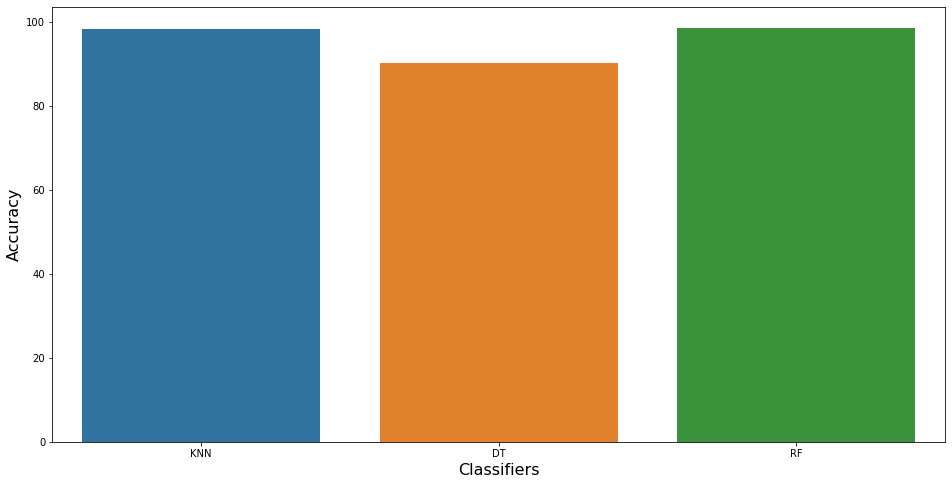

In [63]:
xAxis = ['KNN','DT', 'RF']
yAxis = [knnAc, DTac, RFac]

dframe = pd.DataFrame({"Classifiers" : xAxis, "Accuracy" : yAxis})


plt.figure(figsize=(16, 8))
splot = sns.barplot(x = "Classifiers",y = "Accuracy", data = dframe)
plt.xlabel("Classifiers", size=16)
plt.ylabel("Accuracy", size=16)
plt.savefig("BSL Sign Digits - Accuracy Comparison.png")

In [64]:
compare = pd.DataFrame({'Model': ['KNN','Decision tree','Random Forest'], 
                        'Accuracy': [KNNac,DTac,RFac]})
compare

,Model,Accuracy
0,KNN,98.414086
1,Decision tree,90.172328
2,Random Forest,98.651349


In [65]:
Cmatrix = confusion_matrix(y_test, y_predRF)
Cmatrix

array([[254,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0, 280,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 389,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 362,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 336,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1],
       [  0,   1,   0,   1,   0, 368,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 312,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

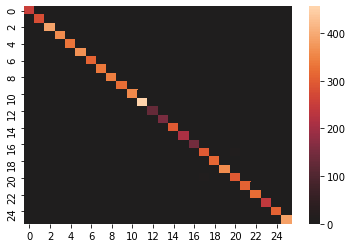

In [104]:
sns.heatmap(Cmatrix, center = True)
plt.show()

In [105]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           A       1.00      0.98      0.99       257
           B       0.99      1.00      0.99       280
           C       0.99      1.00      1.00       389
           D       0.99      1.00      1.00       363
           E       0.98      0.99      0.99       338
           F       0.99      0.99      0.99       371
           G       1.00      1.00      1.00       313
           H       0.99      1.00      1.00       337
           I       0.98      0.99      0.99       344
           J       1.00      0.98      0.99       328
           K       0.99      0.99      0.99       361
           L       1.00      1.00      1.00       457
           M       0.97      0.89      0.93       142
           N       0.97      0.96      0.96       161
           O       0.99      0.98      0.99       301
           P       0.98      0.99      0.98       214
           Q       0.97      0.96      0.96       151
           R       0.96    

In [68]:
result = pd.DataFrame({'original' : y_test,'predicted' : y_predRF})
result

,original,predicted
26226,I,I
34842,L,L
9724,D,D
10430,D,D
10698,D,D
...,...,...
15672,F,F
50973,Q,Q
42517,O,O
68359,W,W


In [69]:
#Save the model in a file
joblib.dump(RF, 'RF_Model.pkl')

['RF_Model.pkl']